# Bài tập 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):

    # your code here ****************************
    result = [row[index] for row in data]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()
    N = len(data)

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)
    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y


X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Bài tập 2

In [12]:
# 2.1
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [13]:
# 2.2
def predict(x1, x2, x3, w1, w2, w3, b):
    # your code here ****************************

    return w1*x1 + w2*x2 + w3*x3 + b


y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [19]:
# 2.3
def compute_loss_mse(y_hat, y):
    # your code here ****************************

    return (y_hat - y)**2


l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [15]:
# 2.4
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db


g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [16]:
# 2.5
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    # your code here ****************************
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    # your code here ****************************
    b = b - lr*dl_db
    return b


after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

1.000005
0.50001
1.000005


In [20]:
def implement_linear_regression ( X_data , y_data , epoch_max = 50 , lr = 1e-5) :
    losses = []

    w1 , w2 , w3 , b = initialize_params()

    N = len( y_data )
    for epoch in range ( epoch_max ) :
        for i in range ( N ) :
            # get a sample
            x1 = X_data [0][ i ]
            x2 = X_data [1][ i ]
            x3 = X_data [2][ i ]
            y = y_data [ i ]

            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

            # compute loss
            loss = compute_loss_mse (y , y_hat )
            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )

            # update parameters
            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b (b , dl_db , lr )

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses )

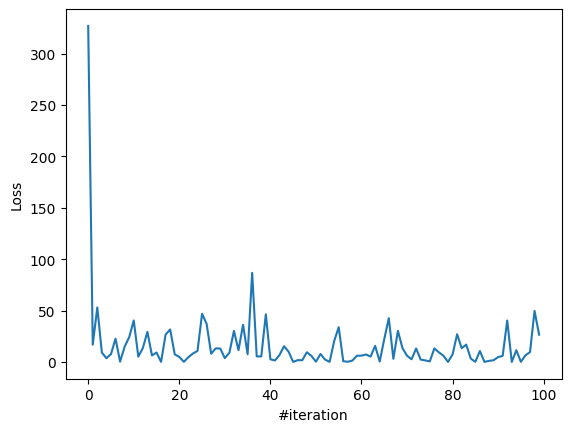

In [21]:
# 2.6
X,y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [22]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [23]:
# given new data
tv = 19.2
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [26]:
def compute_loss_mae(y, y_hat):
    return np.abs(y_hat - y)

# Bài tập 3

In [27]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # print(y)
            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)
            loss_total = loss_total + loss

            # accumulate loss to total loss
            # your code here *****************************

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

           # accumulate gradient w1, w2, w3, b
           # your code here *****************************
            dw1_total = dw1_total + dl_dw1
            dw2_total = dw2_total + dl_dw2
            dw3_total = dw3_total + dl_dw3
            db_total = db_total + dl_db

        # (after processing N samples) - update parameters
        # your code here *****************************
        w1 = update_weight_wi(w1, dl_dw1/N, lr)
        w2 = update_weight_wi(w2, dl_dw2/N, lr)
        w3 = update_weight_wi(w3, dl_dw3/N, lr)
        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

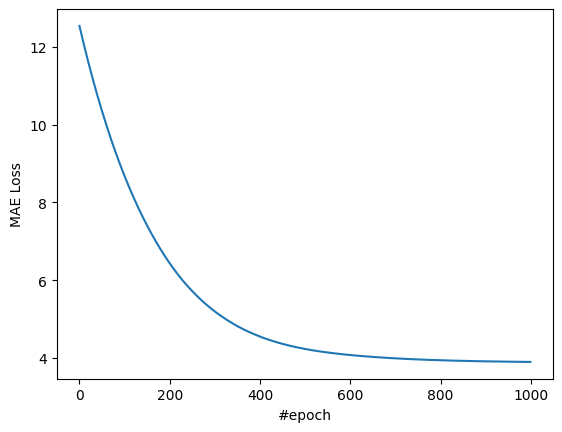

In [28]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [29]:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.07865323031529436 0.00936309067354943 3.4293276428081508e-06


# Bài tập 4

In [55]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [56]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3] 

In [60]:
# Predict ouput by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features, weights):
  return sum([f*w for f,w in zip(X_features, weights)])


def compute_loss(y_hat, y):
  return (y_hat - y)**2

# compute gradient


def compute_gradient_w(X_features, y, y_hat):
  dl_dweights = [2*xi(y_hat - y) for xi in X_features]
  return dl_dweights

# update weights


def update_weight(weights, dl_dweights, lr):
   # your code here *************************
  weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)] 
  return weights

In [63]:
def implement_linear_regression(X_feature, y_ouput, epoch_max = 50,lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i     
          features_i = X_feature[i]
          y = y_ouput[i]
          
          # compute output 
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss) 
  return weights, losses


In [64]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

epoch 0


TypeError: 'int' object is not callable